In [217]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
url = "https://raw.githubusercontent.com/Bhadiyadra-Sarthak/EECS-3401-final/main/car_web_scraped_dataset.csv"
cars = pd.read_csv(url, sep=',')

#Removing all the data before year 2021
cars = cars[(cars.year >= 2021)]

#backup of the current dataset
cars_backup = cars

In [219]:
cars

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
13,Mercedes-Benz GLC,2021,"38,760 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$29,998"
15,Honda Civic,2021,"22,850 miles","White exterior, Black interior","No accidents reported, 1 Owner","$21,998"
...,...,...,...,...,...,...
2831,Ford Escape,2022,"26,521 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$28,468"
2832,Volkswagen Tiguan,2021,"29,540 miles","Black exterior, Gray interior","No accidents reported, 1 Owner","$19,500"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"


In [220]:
cars.head()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
13,Mercedes-Benz GLC,2021,"38,760 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$29,998"
15,Honda Civic,2021,"22,850 miles","White exterior, Black interior","No accidents reported, 1 Owner","$21,998"


In [221]:
cars.describe()

,year
count,1164.000000
mean,2021.647766
std,0.802824
min,2021.000000
25%,2021.000000
50%,2021.000000
75%,2022.000000
max,2024.000000


In [222]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       1164 non-null   object
 1   year       1164 non-null   int64 
 2   miles      1164 non-null   object
 3   color      1164 non-null   object
 4   condition  1164 non-null   object
 5   price      1164 non-null   object
dtypes: int64(1), object(5)
memory usage: 63.7+ KB


In [223]:
cars[['Brand', 'Model']] = cars['name'].str.split(' ', n=1, expand=True)
cars = cars.drop(columns=['name'])

In [224]:
# We will change the object type to int64 for our numerical data such as miles and prices
cars['miles'] = cars['miles'].str.strip('miles').str.replace(',','')
cars['miles'] = cars['miles'].astype('int64')

In [225]:
cars["miles"]

0       41406
1       15138
2       32879
13      38760
15      22850
        ...  
2831    26521
2832    29540
2837    27894
2838    50220
2839    26510
Name: miles, Length: 1164, dtype: int64

In [226]:
cars['price'] = cars['price'].str.replace('$', '').str.replace(',','').str.strip()
cars['price'] = cars['price'].astype('int64')

In [227]:
# Clearing color column
cars['exterior'] = cars['color'].str.extract(r'(\D+),')[0].astype(object)
cars['interior'] = cars['color'].str.extract(r',(\D+)')[0].astype(object)
cars['exterior'] = cars['exterior'].str.strip('exterior').str.replace(' ','')
cars['interior'] = cars['interior'].str.strip('interior').str.replace(' ','')
cars = cars.drop(columns=['color'])

In [228]:
# Clearnig Condition column
cars['accidents'] = cars['condition'].str.extract(r'(\d+)\s*accident').replace(np.nan,0).astype(int)
cars['previous_owners'] = cars['condition'].str.extract(r'reported,\s*(\d+)').astype(int)
cars = cars.drop(columns=['condition'])

In [229]:
# Finished dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164 entries, 0 to 2839
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             1164 non-null   int64 
 1   miles            1164 non-null   int64 
 2   price            1164 non-null   int64 
 3   Brand            1164 non-null   object
 4   Model            1164 non-null   object
 5   exterior         1164 non-null   object
 6   interior         1164 non-null   object
 7   accidents        1164 non-null   int32 
 8   previous_owners  1164 non-null   int32 
dtypes: int32(2), int64(3), object(4)
memory usage: 81.8+ KB


In [230]:
cars

,year,miles,price,Brand,Model,exterior,interior,accidents,previous_owners
0,2022,41406,15988,Kia,Forte,Gray,Black,0,1
1,2021,15138,38008,Chevrolet,Silverado 1500,White,Black,1,1
2,2022,32879,24988,Toyota,RAV4,Silver,Unknown,0,1
13,2021,38760,29998,Mercedes-Benz,GLC,Black,Black,0,1
15,2021,22850,21998,Honda,Civic,White,Black,0,1
...,...,...,...,...,...,...,...,...,...
2831,2022,26521,28468,Ford,Escape,Gray,Black,0,1
2832,2021,29540,19500,Volkswagen,Tiguan,Black,Gray,0,1
2837,2022,27894,29999,Mercedes-Benz,GLC,Gray,Gray,0,2
2838,2021,50220,22992,Honda,CR-V,Gray,Unknown,0,1


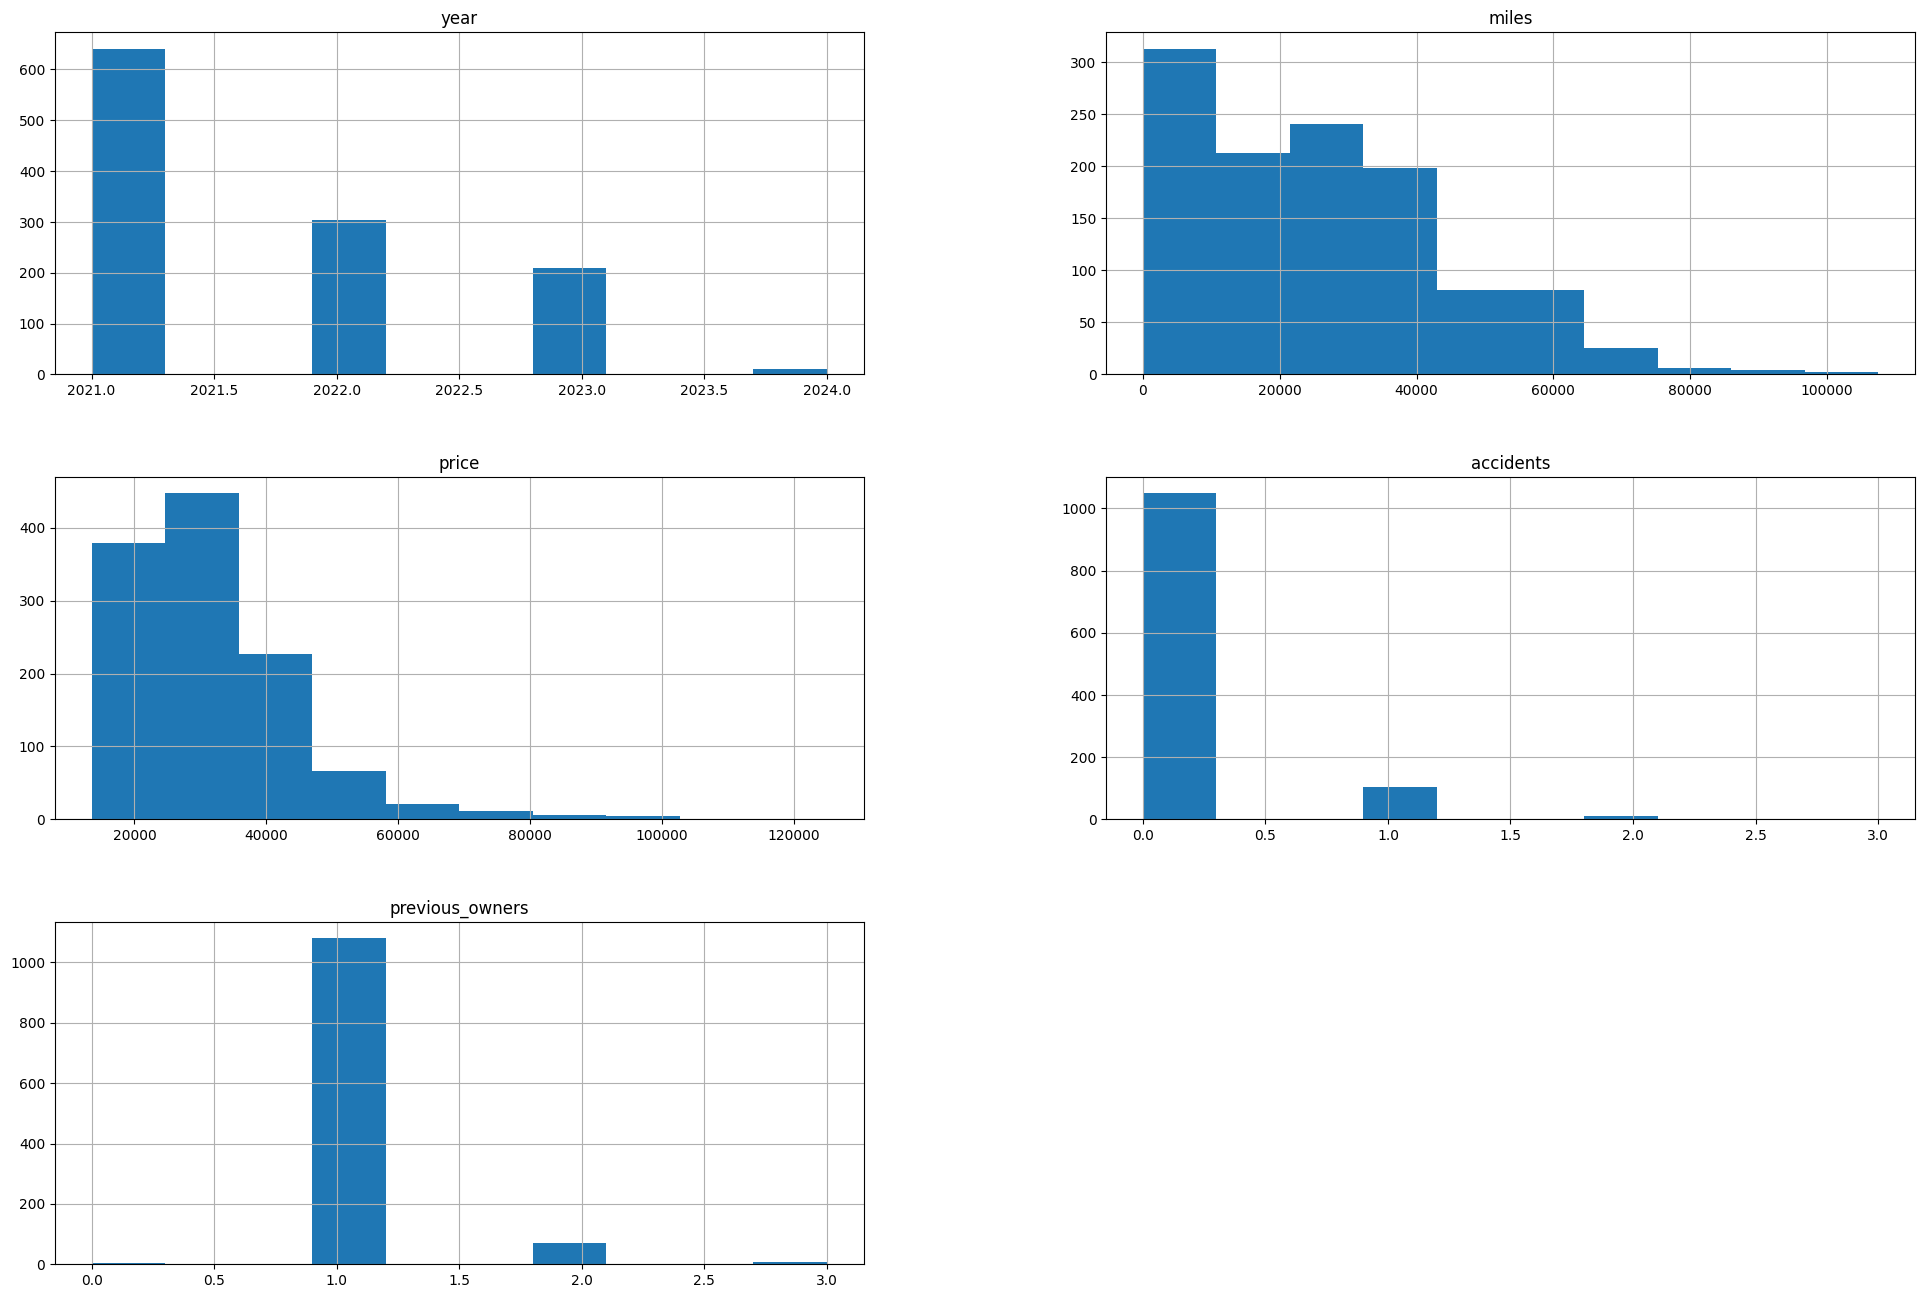

In [231]:
cars.hist(bins= 10,figsize=(24, 16))
plt.show()

In [232]:
# This histogram provides us with better understanding of our dataset.
# Miles and the year of the car affect the car prices and to see how it affects our dataset we will be ploting a lineplot of price vs year and price vs miles

In [233]:
corr_matrix = cars.corr(numeric_only=True)
corr_matrix

,year,miles,price,accidents,previous_owners
year,1.000000,-0.549166,0.310437,-0.169883,-0.101316
miles,-0.549166,1.000000,-0.385931,0.160485,0.081988
price,0.310437,-0.385931,1.000000,-0.100261,0.015721
accidents,-0.169883,0.160485,-0.100261,1.000000,0.052068
previous_owners,-0.101316,0.081988,0.015721,0.052068,1.000000


<Axes: >

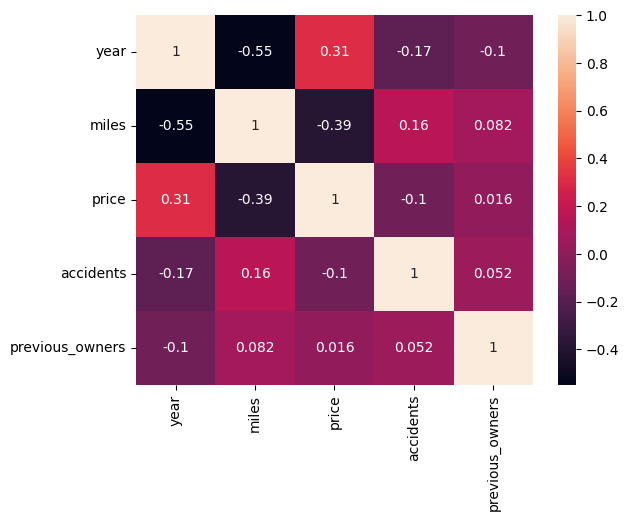

In [234]:
sns.heatmap(corr_matrix, annot=True)

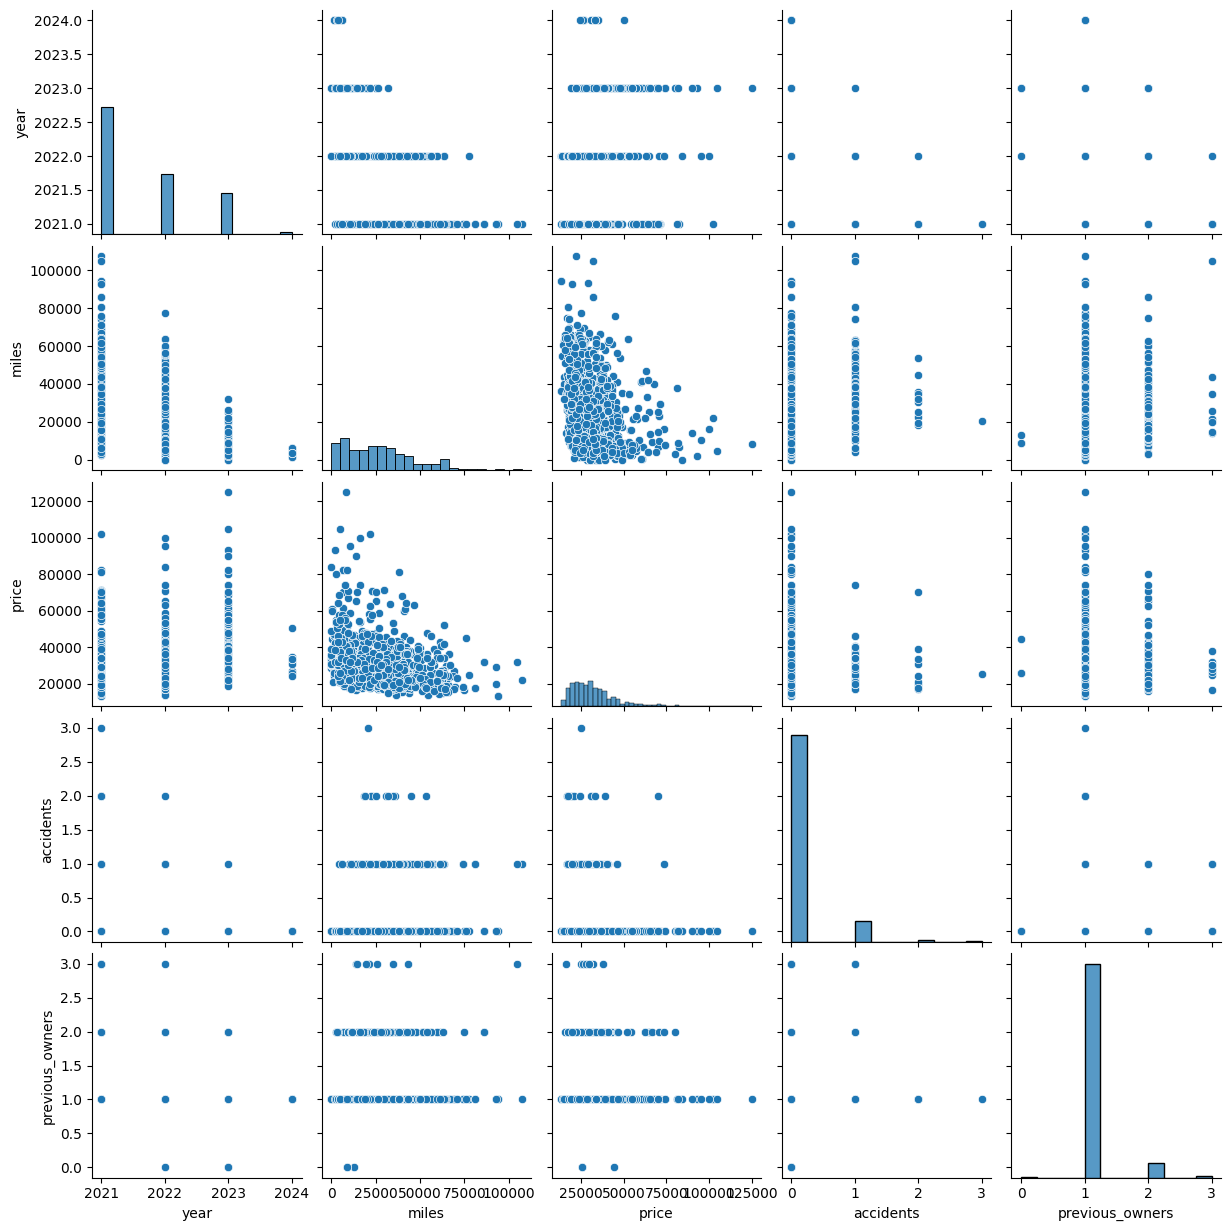

In [235]:
sns.pairplot(cars)
plt.show()

<Axes: xlabel='year', ylabel='price'>

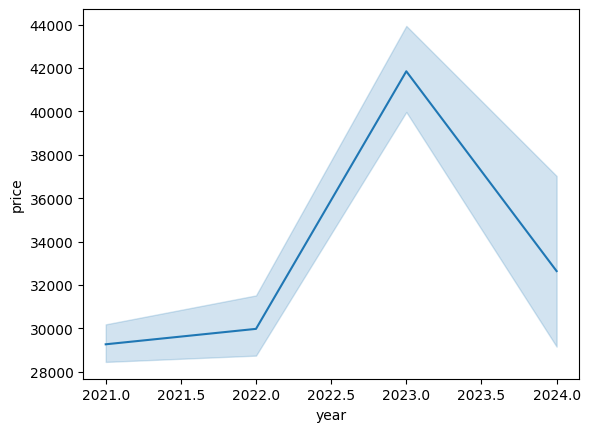

In [236]:
# Year vs price plot
sns.lineplot(x="year", y="price",data=cars)

<Axes: xlabel='miles', ylabel='price'>

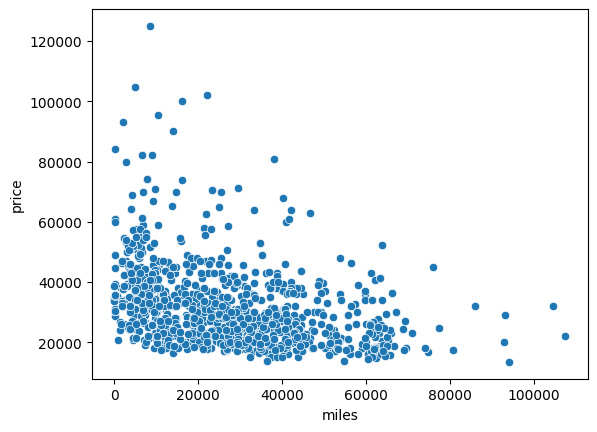

In [237]:
sns.scatterplot(x = 'miles', y = 'price', data=cars)

In [238]:
# Now to find the most expensive Brands for Cars
Most_expensive_cars=cars.sort_values(by='price',ascending=False).head(10)
Most_expensive_cars

,year,miles,price,Brand,Model,exterior,interior,accidents,previous_owners
596,2023,8483,124995,Audi,RS 6 Avant,Gray,Black,0,1
815,2023,4813,104784,Mercedes-Benz,S-Class,Black,Black,0,1
20,2021,21991,102167,Porsche,Cayenne,Silver,Black,0,1
1308,2022,16010,99995,Cadillac,Escalade,White,Black,0,1
2702,2022,10504,95295,Mercedes-Benz,GLE,Silver,Black,0,1
790,2023,2088,93000,Chevrolet,Corvette,Silver,Black,0,1
879,2023,13889,89991,Cadillac,Escalade,Gray,Black,0,1
2080,2022,43,83993,Mercedes-Benz,Sprinter Passenger Van,Black,Black,0,1
838,2021,6537,82150,Chevrolet,Corvette,Yellow,Black,0,1
1040,2021,6537,82150,Chevrolet,Corvette,Yellow,Black,0,1


<Axes: xlabel='Brand', ylabel='price'>

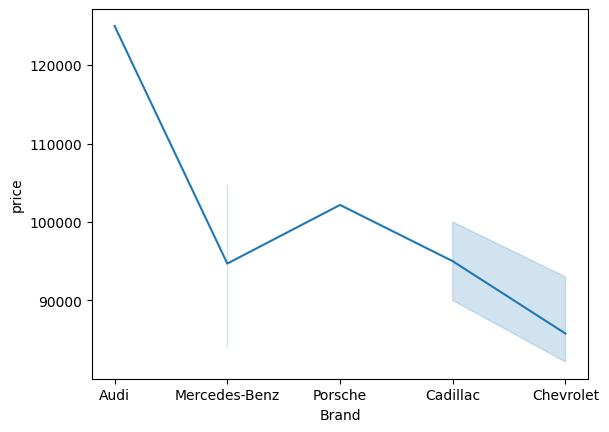

In [239]:
sns.lineplot(x="Brand", y="price", data=Most_expensive_cars)

<Axes: xlabel='exterior', ylabel='price'>

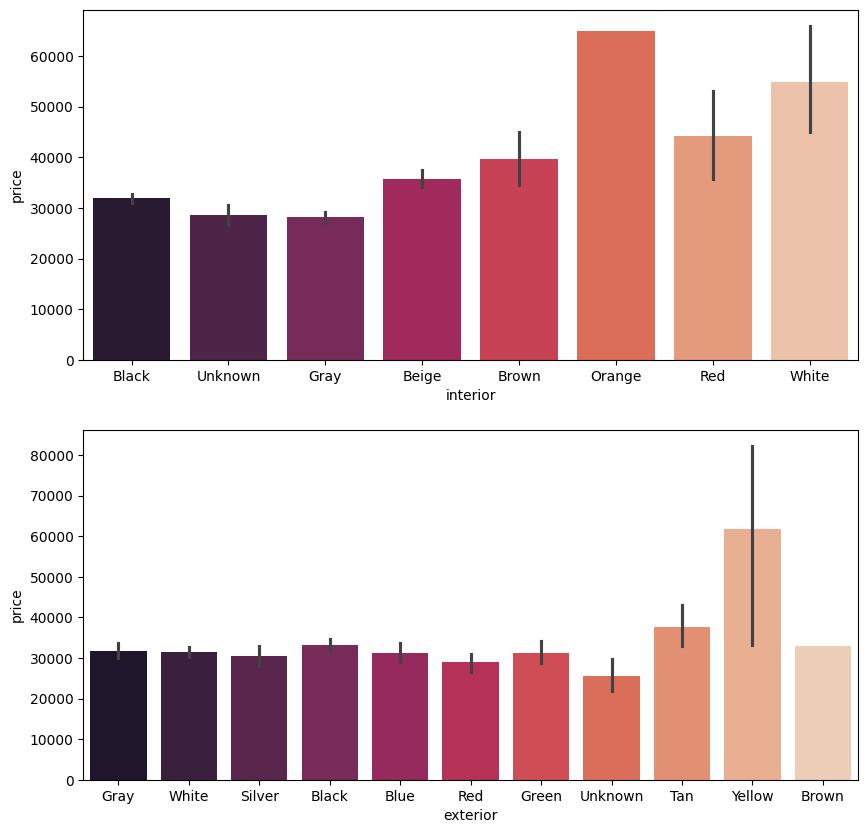

In [240]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(x='interior', y='price',hue='interior', palette="rocket",legend=False, ax=ax1, data=cars)

sns.barplot(x='exterior', y='price',hue='exterior', palette='rocket',legend=False, ax=ax2, data=cars)



In [241]:
# Finding duplicates and droping them

cars.duplicated().sum()

218

In [242]:
cars.drop_duplicates(inplace=True)

In [243]:
# Changing "Unknown" values to nan to better understand the missing data
cars.replace('Unknown', np.nan, inplace=True)
cars.isnull().sum()

year                0
miles               0
price               0
Brand               0
Model               0
exterior            7
interior           37
accidents           0
previous_owners     0
dtype: int64

In [244]:
# Just a Helper method that narrows down sparese data from OneHotEncoder
class DenseTransformer():

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()
    
    def get_feature_names_out(self, input_features=None):
        return input_features

In [245]:
# To handle these null values we will be using KNN Imputer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_cols = cars.select_dtypes(include='number').columns.to_list()
cat_cols = cars.select_dtypes(exclude='number').columns.to_list()

num_cols.remove('price')


num_pipeline = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(),DenseTransformer(),KNNImputer(n_neighbors=15, weights='uniform'))

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols),],
                                    remainder='passthrough'
                                 )


In [246]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['year', 'miles', 'accidents',
                                  'previous_owners']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder()),
                                                 ('densetransformer',
                                                  <__main__.DenseTransformer object at 0x00000182F6F27690>),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=15))]),
                                 ['Brand', 'Model', 'exterior', 'interior'])])

In [247]:
# Apply the preprocessing pipeline on the dataset
cars_prep = preprocessing.fit_transform(cars)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
cars_prep = pd.DataFrame(data=cars_prep, columns=feature_names)

cars_prep


,num__year,num__miles,num__accidents,num__previous_owners,cat__Brand_Acura,cat__Brand_Alfa,cat__Brand_Audi,cat__Brand_BMW,cat__Brand_Buick,cat__Brand_Cadillac,...,cat__exterior_nan,cat__interior_Beige,cat__interior_Black,cat__interior_Brown,cat__interior_Gray,cat__interior_Orange,cat__interior_Red,cat__interior_White,cat__interior_nan,remainder__price
0,0.474539,0.775789,-0.323456,-0.267202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15988.0
1,-0.782923,-0.623938,2.408595,-0.267202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,38008.0
2,0.474539,0.321416,-0.323456,-0.267202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24988.0
3,-0.782923,0.634794,-0.323456,-0.267202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29998.0
4,-0.782923,-0.212993,-0.323456,-0.267202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.474539,-0.017379,-0.323456,-0.267202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28468.0
942,-0.782923,0.143493,-0.323456,-0.267202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19500.0
943,0.474539,0.055784,-0.323456,2.932453,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29999.0
944,-0.782923,1.245456,-0.323456,-0.267202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22992.0


In [248]:
# Creating a model and Testing

from sklearn.model_selection import train_test_split

X = cars_prep.drop(["remainder__price"], axis=1)
y = cars_prep["remainder__price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(756, 223) (756,) (190, 223) (190,)


In [249]:
from sklearn.metrics import root_mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [250]:
#Linear Model
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)


LinearRegression()

In [251]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)


lr_mse=mse(y_test, lr_y_predict)
lr_mse

464237810770534.25

In [252]:
# Support Vector Regression
svrModel = SVR()
svrModel.fit(X_train,y_train)

SVR()

In [253]:
# Predict SVR
svrpredict = svrModel.predict(X_test)
svr_mse = mse(y_test, svrpredict)

svr_mse

15260.533510797772

In [254]:
# Stochastic Gradient Descent Regression
sgdrModel = SGDRegressor()
sgdrModel.fit(X_train,y_train)

c:\Users\Sarthak Bhadiyadra\anaconda3\envs\pythonProject2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor()

In [255]:
sgdrpredict = sgdrModel.predict(X_test)
sgdr_mse = mse(y_test, sgdrpredict)

sgdr_mse

9224.664268178081

In [256]:
# Gradient Boosting Regression
gbrModel = GradientBoostingRegressor()
gbrModel.fit(X_train,y_train)

GradientBoostingRegressor()

In [257]:
gbrpredict = gbrModel.predict(X_test)
gbr_mse = mse(y_test, gbrpredict)

gbr_mse

10693.563441079415

In [260]:
print(f'Linear Regression RMSE: {lr_mse}')
print(f'Support Vector Regression RMSE: {svr_mse}')
print(f'Stochastic Gradient Descent Regression RMSE: {sgdr_mse}')
print(f'Gradient Boosting Regression RMSE: {gbr_mse}')


Linear Regression RMSE: 464237810770534.25
Support Vector Regression RMSE: 15260.533510797772
Stochastic Gradient Descent Regression RMSE: 9224.664268178081
Gradient Boosting Regression RMSE: 10693.563441079415


In [ ]:
# As we Can see here Stochastic Gradient Descent Regression RMSE is 9224.664268178081
# Which is the best one among all the others

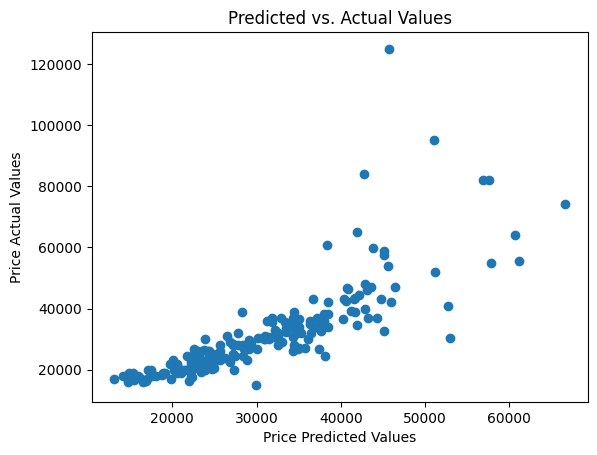

In [261]:
import matplotlib.pyplot as plt

sgdr_predict = sgdrModel.predict(X_test)  # X is your feature data
plt.scatter(sgdr_predict, y_test)  # y is your actual target values
plt.xlabel("Price Predicted Values")
plt.ylabel("Price Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()